# 음성 통화 데이터 분석
* 음성 통화 데이터 분석을 통해 특정 지역에서 많이 주문하는 음식의 종류를 파악하기

### 문제정의 
서울의 중심지인 강남에서 어떤 음식을 자주 시켜먹는지 알아보기

### 문제
강남에 거주하는 사람들은 어떤 종류의 음식을 자주 주문하는가?

### 검증 방식
음성통화 데이터를 활용하여 특정 지역[강남]에서 어떤 종류의 음식을 많이 주문하는지 확인한다.

## 데이터 구성
* 일자 (YYYYMMDD) : 통화 일자
* 연령 : 나이
* 성별 : 성별
* 발신지(시도) : 음성통화 발신지(시도)
* 발신지(시군구) : 음성통화 발신지(시군구)
* 대분류 : 통화 업종 대분류
* 중분류 : 통화 업종 중분류
* 통화비율(시군구내) : 급여 (단위 : €유로)


> 출처 : SKT Data Hub, 음성통화 이용데이터 - 20년 09월
https://www.bigdatahub.co.kr/product/view.do?pid=1002333

## 음성 통화 데이터 구조 확인

In [1]:
import numpy as np
import pandas as pd

In [2]:
call_data = pd.read_csv('call_data.csv')

In [3]:
call_data.shape

(561129, 8)

In [4]:
call_data.head(3)

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내)
0,20200921,50,여성,강원,강릉시,생활편의,생활서비스,0.0001
1,20200927,60,남성,강원,강릉시,생활편의,생활편의,0.0001
2,20200927,40,여성,강원,강릉시,음식점,중식,0.0001


In [5]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561129 entries, 0 to 561128
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일자(YYYYMMDD)  561129 non-null  int64  
 1   연령            561129 non-null  int64  
 2   성별            561129 non-null  object 
 3   발신지(시도)       561129 non-null  object 
 4   발신지(시군구)      561129 non-null  object 
 5   대분류           561129 non-null  object 
 6   중분류           561129 non-null  object 
 7   통화비율(시군구내)    561129 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 34.2+ MB


In [6]:
call_data.columns # 데이터의 속성명

Index(['일자(YYYYMMDD)', '연령', '성별', '발신지(시도)', '발신지(시군구)', '대분류', '중분류',
       '통화비율(시군구내)'],
      dtype='object')

## 음성 통화 데이터 정리

* 발신지 정리

In [7]:
call_data.rename(columns={'발신지(시도)':'시도', '발신지(시군구)':'시군구'},inplace=True)

**!!inplace=True!!**

In [8]:
call_data.head(2)

,일자(YYYYMMDD),연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
0,20200921,50,여성,강원,강릉시,생활편의,생활서비스,0.0001
1,20200927,60,남성,강원,강릉시,생활편의,생활편의,0.0001


In [9]:
call_data['대분류'].unique()

array(['생활편의', '음식점', '서비스산업', '교통편의', '금융편의', '공공편의', '여행', '쇼핑', '의료편의',
       '스포츠/레저', '교육/학문', '기업/단체', '이벤트', '건물/시설'], dtype=object)

* 음식점 관련 통화 데이터만 변수에 저장

In [10]:
food_call = call_data[call_data['대분류'] == '음식점']

In [17]:
food_call.head(10)

,일자(YYYYMMDD),연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
2,20200927,40,여성,강원,강릉시,음식점,중식,0.0001
5,20200919,40,여성,강원,강릉시,음식점,중식,0.0002
7,20200916,20,남성,강원,강릉시,음식점,한식,0.0001
8,20200914,40,남성,강원,강릉시,음식점,치킨,0.0001
18,20200919,50,여성,강원,강릉시,음식점,한식,0.0003
26,20200912,40,여성,강원,강릉시,음식점,분식,0.0001
29,20200902,30,여성,강원,강릉시,음식점,한식,0.0003
35,20200902,40,남성,강원,강릉시,음식점,한식,0.0003
36,20200918,40,여성,강원,강릉시,음식점,중식,0.0001
37,20200920,50,여성,강원,강릉시,음식점,한식,0.0002


## 음성 통화 데이터 분석

* 서울 내 특정 지역에서 자주 주문해 먹는 음식점의 종류

> `food_call`에 들어있는 데이터프레임의 구역 컬럼이 서울인 데이터프레임을 추출하여 `seoul`에 저장

In [20]:
food_call['시도'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [21]:
seoul = food_call[food_call['시도']== '서울']
seoul.head(2)

,일자(YYYYMMDD),연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
161455,20200915,40,여성,서울,강북구,음식점,치킨,0.0001
161460,20200916,40,남성,서울,강북구,음식점,중식,0.0001


In [22]:
seoul['시군구'].unique()

array(['강북구', '강서구', '관악구', '광진구', '노원구', '동작구', '마포구', '서초구', '성북구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '강남구', '강동구', '구로구', '금천구',
       '도봉구', '동대문구', '서대문구', '성동구', '송파구', '양천구', '중랑구'], dtype=object)

> * 음식 종류별 주문 전화량을 알고싶은 지역명을 `input()`함수를 활용하여 입력받아 name 변수에 저장 
> * seoul에서 지역 컬럼이 name인 데이터프레임을 추출하여 location 변수에 저장하고 중분류 컬럼의 데이터 값 분포를 출력

In [122]:
name = input("음식 종류별 주문 전화량을 알고싶은 지역명을 입력하세요")
s_location = food_call[food_call['시군구']== name]
food = s_location['중분류'].value_counts()
food

음식 종류별 주문 전화량을 알고싶은 지역명을 입력하세요강남구


한식    176
치킨      6
중식      3
양식      1
간식      1
Name: 중분류, dtype: int64

## 음성 통화 데이터 시각화

세로 막대그래프`bar()`
* 그래프 사이즈 : (7,7)
* X값 : food.index
* Y값 : food.values
* 그래프 제목 : “주문 그래프”, 글자 크기 20
* X축 이름 : “종류” 글자 크기 15
* Y축 이름 : “주문 수” 글자 크기 15

In [40]:
import matplotlib.pyplot as plt

In [43]:
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

Text(0, 0.5, '주문 수')

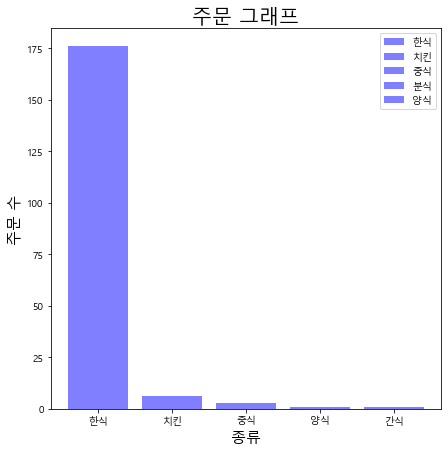

In [129]:
plt.figure(figsize=(7,7))
plt.title('주문 그래프', size = 20)
#plt.bar(food.index, food.values, color='blue', alpha=0.5)
ax = plt.bar(food.index, food.values, color='blue',alpha=0.5)
plt.legend(handles = ax,labels= ['한식','치킨','중식','분식','양식'])
plt.xlabel('종류', size = 15)
plt.ylabel('주문 수', size = 15)

In [95]:
kind = [food.index[i] for i in range(0,len(food.index))]
kind

['한식', '치킨', '중식', '분식', '양식']

Text(0, 0.5, '주문 수')

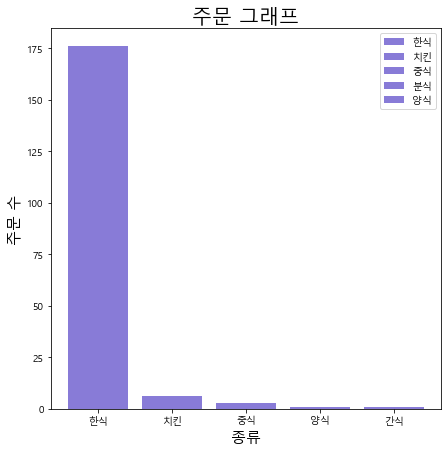

In [130]:
plt.figure(figsize=(7,7))
plt.title('주문 그래프', size = 20)
#plt.bar(food.index, food.values, color='slateblue', alpha=0.8)
ax = plt.bar(food.index, food.values, color='slateblue',alpha=0.8)
plt.legend(handles = ax,labels= kind)
plt.xlabel('종류', size = 15)
plt.ylabel('주문 수', size = 15)

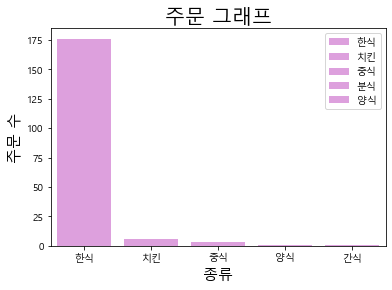

In [132]:
food.plot(kind='bar',rot=0,color='plum')
ax = plt.bar(food.index, food.values, color='plum')
plt.title('주문 그래프', size = 20)
plt.legend(handles = ax,labels= ['한식','치킨','중식','분식','양식'])
plt.xlabel('종류', size = 15)
plt.ylabel('주문 수', size = 15)
plt.show()

## 데이터 분석 결과
1. 특정 지역(서울 강남구)을 기준으로 가장 많이 주문하는 음식은 **한식**
2. 특정 지역(서울 강남구)을 기준으로 한식, 치킨, 중식, 양식, 간식 순으로 주문 수가 많음을 확인